## Labo Week 5 : Lineaire Modellen en Decision Trees

### Deel 1 : Lineaire Modellen

**Oefening 1** : **Regressie via Lineaire Modellen**

Gegeven een uitgebreidere versie van de autoverbruikdata met extra features : auto_extra.txt. De taak blijft nog steeds om de target _miles_per_gallon_ ($mpg$) te voorspellen.

Uit de oorspronkelijke beschrijving van de data set :

 "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)
  Number of Instances: 398
  Number of Attributes: 9 including the class attribute
  Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

Lees de data in via volgend commando :

```
data = pd.read_table('auto_extra.txt', delim_whitespace=True)
```
**1.1** Inspecteer de data en merk op dat het type van de kolom _horsepower_ geen $float$ is zoals men zou verwachten. Waarom niet? Kan je dit herstellen?

**1.2** Bereken de **correlatiematrix** van de features en ga op basis hiervan na welke features je zou meenemen.
Gebruik volgende tutorial om de correlatiematrix te berekenen en te plotten : <http://benalexkeen.com/correlation-in-python/>

**1.3** Stel een regressiemodel op. Gebruik hierbij volgende features : "cylinders", "displacement", "horsepower", "weight" en "acceleration"  Test de verschillende algoritmen die je gezien hebt : Lineair Regression, Ridge en Lasso. Doe een grondige analyse van de parameter $\alpha$ vooraleer je accuracy scores berekent en vergelijkt. Ga ook na welke coëfficiënten het algoritme teruggeeft.

**1.4** Gebruik je 3 modellen om de mpg van een moderne wagen te voorspellen : 
  toyota_prius : cylinders : 4, displacement : 497, horsepower: 72, weight: 3626, acceleration : 13.4. De werkelijke mpg is $28.93593047$

In [1]:
#1.1
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_table('auto_extra.txt', delim_whitespace=True)
type(data['horsepower'][0])

data['horsepower'].replace('?', 0, inplace= True)

data['horsepower'] = data['horsepower'].astype('float')

print(data.to_string())

      mpg  cylinders  displacement  horsepower  weight  acceleration  modelyear  origin                                  name
0    18.0          8         307.0       130.0  3504.0          12.0         70       1             chevrolet chevelle malibu
1    15.0          8         350.0       165.0  3693.0          11.5         70       1                     buick skylark 320
2    18.0          8         318.0       150.0  3436.0          11.0         70       1                    plymouth satellite
3    16.0          8         304.0       150.0  3433.0          12.0         70       1                         amc rebel sst
4    17.0          8         302.0       140.0  3449.0          10.5         70       1                           ford torino
5    15.0          8         429.0       198.0  4341.0          10.0         70       1                      ford galaxie 500
6    14.0          8         454.0       220.0  4354.0           9.0         70       1                      chevrolet

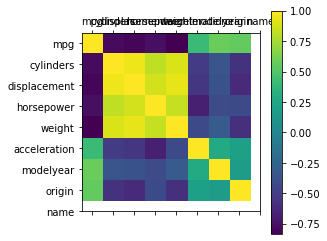

In [2]:
#1.2
data.corr()

plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()

plt.show()

In [3]:
#1.3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

x_train, x_test, y_train, y_test = train_test_split(data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']], data['mpg'] , random_state=42, test_size=0.3)

#lineair
modelLR = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("lr.coef_:", modelLR.coef_)
print("Lineair Training set score: {:.2f}".format(modelLR.score(x_train, y_train)))
print("Lineair Test set score: {:.2f}".format(modelLR.score(x_test, y_test)))

#ridge
ridge = Ridge(alpha=10.001).fit(x_train, y_train)
print("ridge.coef_:", ridge.coef_)
print("Ridge Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Ridge Test set score: {:.2f}".format(ridge.score(x_test, y_test)))

#lasso
lasso = Lasso(alpha=100000, max_iter=100000).fit(x_train, y_train)
print("lasso.coef_:", lasso.coef_)
print("Lasso Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Lasso Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print("Lasso Number of features used:", np.sum(lasso.coef_ != 0))

lr.coef_: [ 0.11766186 -0.01416876 -0.02816967 -0.00531387  0.06038403]
Lineair Training set score: 0.70
Lineair Test set score: 0.72
ridge.coef_: [ 0.10310813 -0.01396328 -0.0282145  -0.00530999  0.0596818 ]
Ridge Training set score: 0.70
Ridge Test set score: 0.72
lasso.coef_: [-0. -0. -0. -0.  0.]
Lasso Training set score: 0.00
Lasso Test set score: -0.00
Lasso Number of features used: 0


In [4]:
#1.4
X_new = np.array([[4, 497, 72, 3626, 13.4]])
print(modelLR.predict(X_new))
print(ridge.predict(X_new))
print(lasso.predict(X_new))

[16.33487287]
[16.42376654]
[23.44676259]


**Oefening 2** : **Classificatie a.d.h.v. lineaire modellen**

De taak is om op basis van 2 examenresultaten van studenten te gaan voorspellen of ze toegelaten zullen worden om in te schrijven voor een bepaalde cursus. 

**2.1** Lees de txt file : cijfers.txt in via pandas. Zorg ervoor dat je tabel de volgende kolomhoofden heeft : 'Examen1', 'Examen2', 'Toegelaten'. 

**2.2** Visualiseer deze data door een scatterplot te maken van de aanwezige data. Geef elke klasse een andere kleur. Feature 1= 'Examen1' plaats je op de x-as, Feature 2 = 'Examen 2' plaats je op de y-as.

**2.3**Stel een model op via LogisticRegression, splits je data in een trainings en testset ($25\%$ van de data hou je om de testen)

**2.4** Bereken de **accuracy van je model** en plot de lineaire **decision boundary** die je bekomt bovenop je scatterplot. Je model zal 2 coëfficienten weergeven ($a_1$ en $a_2$ want er zijn 2 features aanwezig) en een intercept($a_0$). Deze kan je opvragen via  

```
model.coef_[0]
model.intercept_[0]
```

De vergelijking van je decision boundary verkrijg je als volgt :

\begin{equation}
0 = a_0 + a_1 * x_1 + a_2x_2 \\
x_2 = - \frac{a_0 + a_1 * x_1}{a_2}\\
\end{equation}


$x_2$ stelt feature 2 voor en bevindt zich op de y-as, $x_1$ stelt feature 1 voor en bevindt zich op de x-as, dus de vergelijking van de rechte heeft volgende vorm : 


\begin{equation} 
y  =  - \frac{a_0 + a_1 * x}{a_2}
\end{equation}




**2.5** Tenslotte varieer je volgende parameters om je accuracy te verhogen :

    - De parameter C waarmee je de waarde van regularizatie aanpast. Hoe kleiner C hoe sterker de regularizatie.
    
    - De parameter random_state die de seed van de pseudo random generator in de train_test_split methode instelt
    
  Ga ook telkens visueel na wat het effect is op je decision boundary.



In [5]:
#2.1
cijfers = pd.read_table('cijfers.txt', names=["Examen1", "Examen2", "Toegelaten"], sep=",")
cijfers

Examen1    Examen2  Toegelaten
0   34.623660  78.024693           0
1   30.286711  43.894998           0
2   35.847409  72.902198           0
3   60.182599  86.308552           1
4   79.032736  75.344376           1
..        ...        ...         ...
95  83.489163  48.380286           1
96  42.261701  87.103851           1
97  99.315009  68.775409           1
98  55.340018  64.931938           1
99  74.775893  89.529813           1

[100 rows x 3 columns]

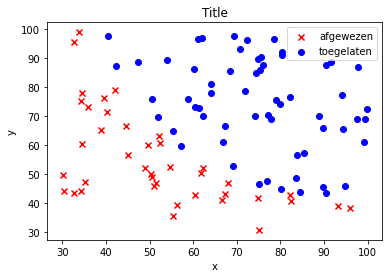

In [6]:
#2.2
import matplotlib.pyplot as plt
plt.scatter(x=cijfers['Examen1'][cijfers.Toegelaten == 0], color='r', y=cijfers['Examen2'][cijfers.Toegelaten == 0], label='afgewezen', marker='x')
plt.scatter(x=cijfers['Examen1'][cijfers.Toegelaten == 1], color='b', y=cijfers['Examen2'][cijfers.Toegelaten == 1], label='toegelaten')
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
#2.3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cijfers[["Examen1", "Examen2"]],cijfers["Toegelaten"], test_size=0.25, random_state=0)

logisticRegr = LogisticRegression(solver='liblinear', multi_class = 'auto', C=5)
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=5, solver='liblinear')

In [8]:
#2.4
print(logisticRegr.coef_[0])
coef1 = logisticRegr.coef_[0][0:1]
coef2 = logisticRegr.coef_[0][1:]
print(logisticRegr.intercept_)

# yy = - ( logisticRegr.intercept_[0] + (coef1 * cijfers['Examen1'][30] )) / coef2
# yy2 = - ( logisticRegr.intercept_[0] + (coef1 * cijfers['Examen1'][90] )) / coef2
# yRechte = [yy[0], yy2[0]]
xRechte = [30, 100]
yRechte = -(logisticRegr.intercept_[0] + coef1 * xRechte) / coef2

print(yRechte)

[0.0641161  0.06088692]
[-7.54221758]
[92.28146782 18.56897951]


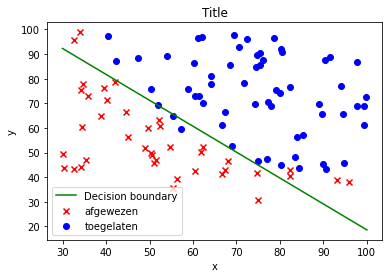

In [9]:
plt.scatter(x=cijfers['Examen1'][cijfers.Toegelaten == 0], color='r', y=cijfers['Examen2'][cijfers.Toegelaten == 0], label='afgewezen', marker='x')
plt.scatter(x=cijfers['Examen1'][cijfers.Toegelaten == 1], color='b', y=cijfers['Examen2'][cijfers.Toegelaten == 1], label='toegelaten')
plt.plot(xRechte, yRechte, color='g', label = 'Decision boundary')
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [10]:
#2.5

### Deel 2 : Decision Trees

<div class="alert alert-block alert-warning">
<strong>Opmerking.</strong> Het tekenen van decision trees kan gewoon via <strong> Matplotlib </strong> of met iets meer mogelijkheden via de package <strong>python-graphviz</strong>. 
Wanneer GraphViz niet standaard mee geïnstalleerd werd onder Anaconda, kan je de package <strong>python-graphviz</strong> toevoegen in Anaconda (onder environments). Dit kan een tijdje duren. Herstart je kernel om de installatie te kunnen gebruiken.

Meer info over het tekenen van decision trees kan je vinden onder volgende tutorial : 
    https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

</div>

**Oefening 3** : **Classificatie via Decision trees + visualisatie van een tree**

**3.1 De data verkennen**

Gegeven de dataset van housing.csv. Deze dataset kan worden gebruikt om te voorspellen of een appartement in New York gelegen is of in San Fransisco. Het bestand bevat volgende kolommen:
 * in_sf: het te voorspellen target: staat op 1 indien het appartement in San Francisco gelegen is
 * beds: het aantal bedden
 * bath: het aantal baden
 * price: de verkoopprijs (\$)
 * year_built: het bouwjaar
 * sqft: de oppervlakte in square foot
 * price_per_sqft: de prijs (\$) per square foot
 * elevation: hoogte in m

Een leuke visuele intro op deze oefening vind je hier: _http://www.r2d3.us/visual-intro-to-machine-learning-part-1/_

 * Laad de data in in een Pandas-dataframe (gelieve niks te veranderen aan het csv-bestand, tip: skippen).
 * Maak een scatter_matrix-plot van de __features__ waarbij elke instanties steeds ingekleurd wordt volgens zijn target (met colormap 'brg' wordt San Francisco groen en New York blauw)
 * Teken met Pandas (groupby en hist(alpha=0.4)) een histogram (met verschillende kleur voor SF en NY) voor een aantal features waarvan je verwacht dat de spreiding voor de 2 steden sterk verschilt
 zie ook : https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
 

<function matplotlib.pyplot.show(close=None, block=None)>

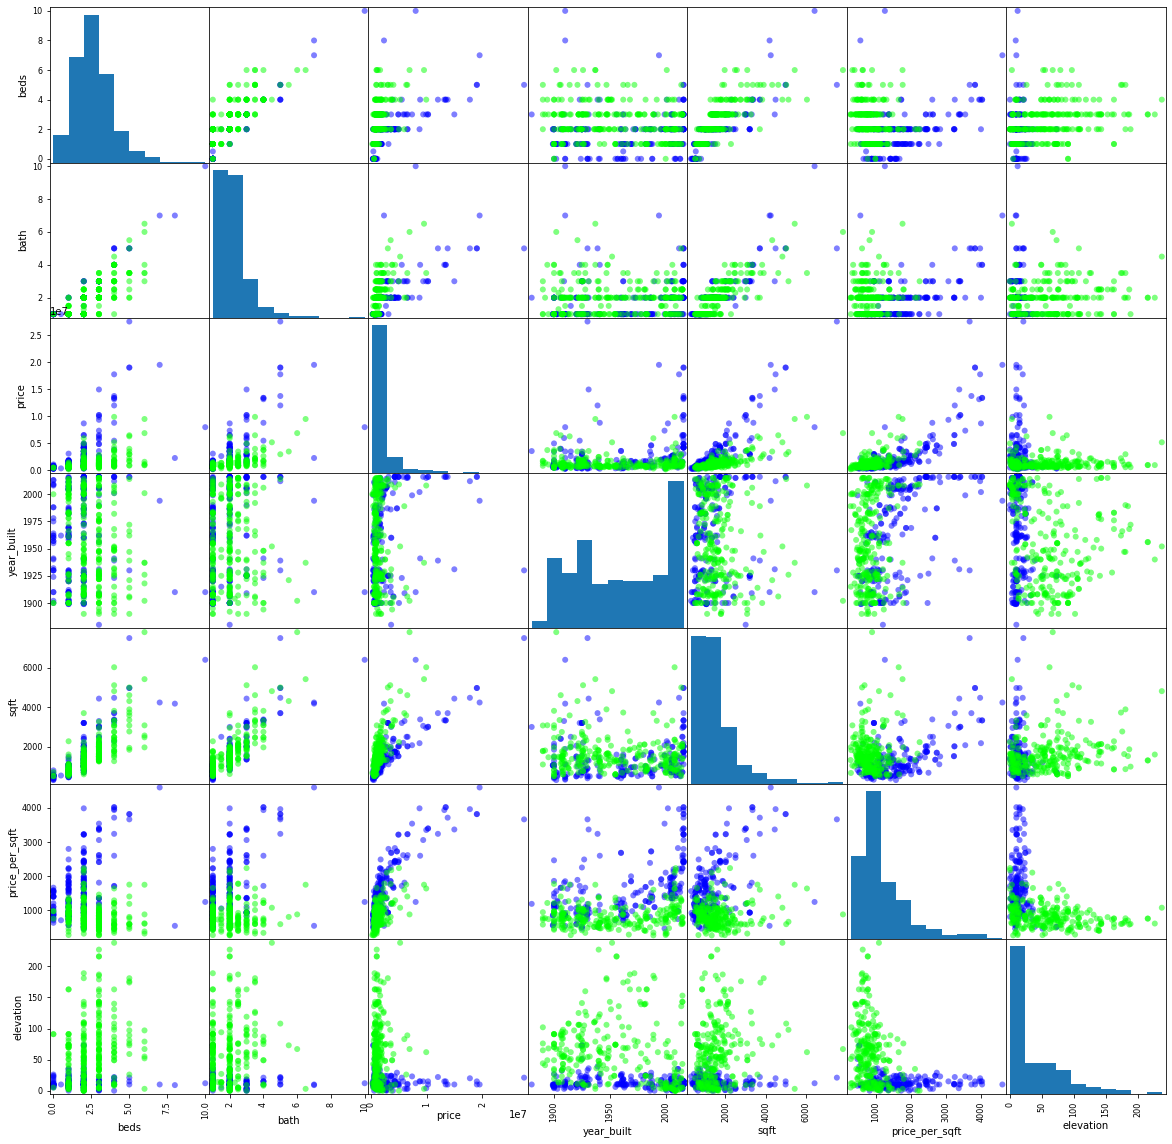

In [11]:
#3.1
from pandas.plotting import scatter_matrix
housing = pd.read_csv('housing.csv', skiprows = 2)

pd.plotting.scatter_matrix(housing[['beds', 'bath','price','year_built','sqft','price_per_sqft','elevation']], marker = 'o',figsize=(20,20), c=housing['in_sf'], cmap='brg')
plt.show

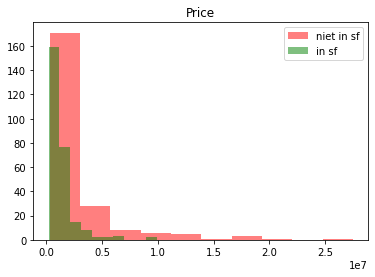

In [12]:
plt.hist(housing['price'][housing.in_sf == 0], color='r', label='niet in sf', alpha = 0.5)
plt.hist(housing['price'][housing.in_sf == 1], color='g', label='in sf', alpha = 0.5)
plt.title('Price')
plt.legend()

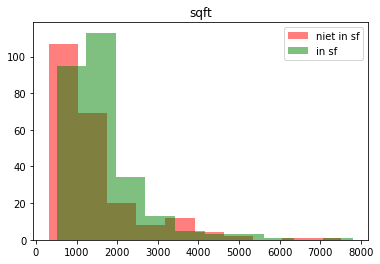

In [13]:
plt.hist(housing['sqft'][housing.in_sf == 0], color='r', label='niet in sf', alpha = 0.5)
plt.hist(housing['sqft'][housing.in_sf == 1], color='g', label='in sf', alpha = 0.5)
plt.title('sqft')
plt.legend()

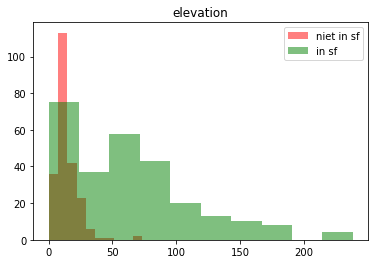

In [14]:
plt.hist(housing['elevation'][housing.in_sf == 0], color='r', label='niet in sf', alpha = 0.5)
plt.hist(housing['elevation'][housing.in_sf == 1], color='g', label='in sf', alpha = 0.5)
plt.title('elevation')
plt.legend()

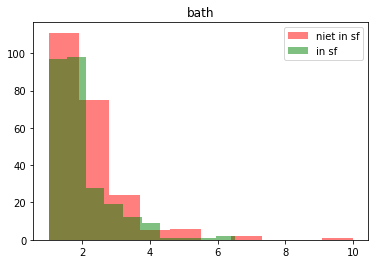

In [15]:
plt.hist(housing['bath'][housing.in_sf == 0], color='r', label='niet in sf', alpha = 0.5)
plt.hist(housing['bath'][housing.in_sf == 1], color='g', label='in sf', alpha = 0.5)
plt.title('bath')
plt.legend()

 
 
 **3.2 Training en parameter tuning**

 * Deel de data in in een trainingset en een test set (70%/30%) - kies een random_state &ne; 0 bv. 88
 * Train deze data met DecisionTreeClassifier zonder parameters
 * Schrijf een script dat de ideale diepte zoekt van de decision tree 
 * Plot de tree die je bekomt ofwel via `plot_tree` van matplotlib ofwel via 
 

In [16]:
housing

in_sf  beds  bath    price  year_built  sqft  price_per_sqft  elevation
0        0   2.0   1.0   999000        1960  1000             999         10
1        0   2.0   2.0  2750000        2006  1418            1939          0
2        0   2.0   2.0  1350000        1900  2150             628          9
3        0   1.0   1.0   629000        1903   500            1258          9
4        0   0.0   1.0   439000        1930   500             878         10
..     ...   ...   ...      ...         ...   ...             ...        ...
487      1   5.0   2.5  1800000        1890  3073             586         76
488      1   2.0   1.0   695000        1923  1045             665        106
489      1   3.0   2.0  1650000        1922  1483            1113        106
490      1   1.0   1.0   649000        1983   850             764        163
491      1   3.0   2.0   995000        1956  1305             762        216

[492 rows x 8 columns]

In [52]:
#3.2
from sklearn import tree

housing = housing.astype(np.float32)
housing['in_sf'] = housing['in_sf'].astype(np.int)

housing.dropna(inplace = True)

x_train, x_test, y_train, y_test = train_test_split(
    housing[['beds','bath','price','year_built','sqft','price_per_sqft','elevation']], housing['in_sf'], random_state= 88, test_size=0.3)


356    1
365    1
348    1
298    1
283    1
      ..
362    1
433    1
463    1
288    1
472    1
Name: in_sf, Length: 344, dtype: int32

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


pandas.core.series.Series

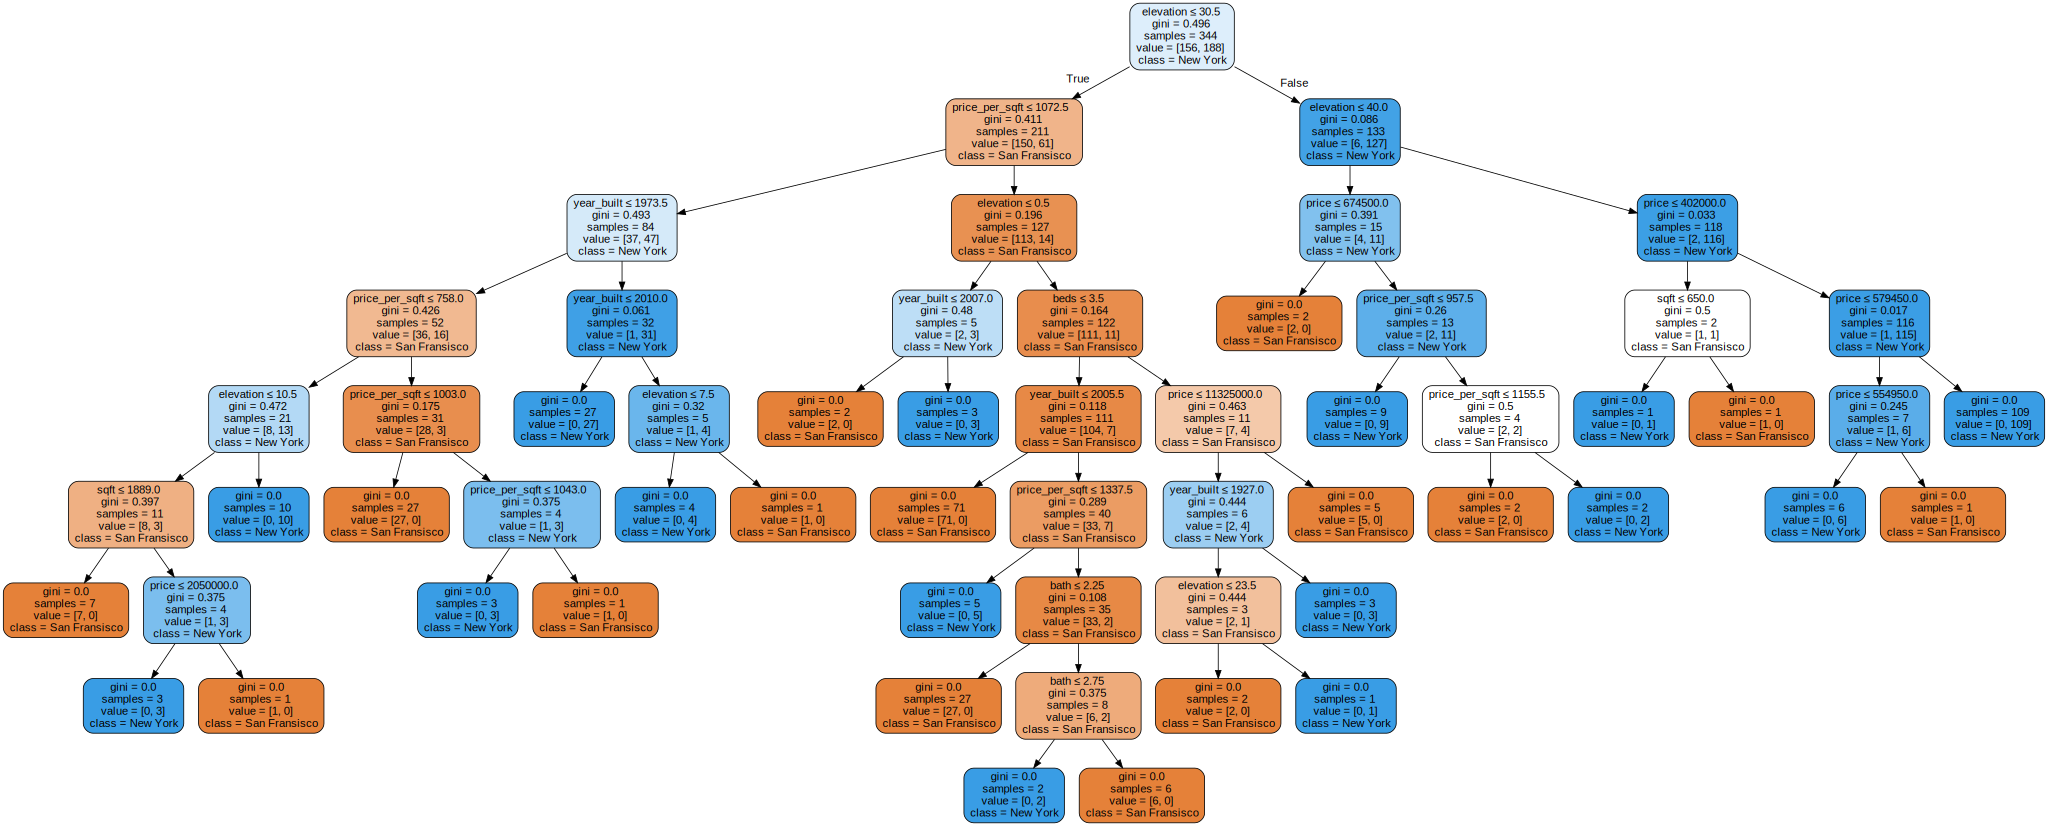

In [71]:
import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("housing") 
# graph

y_train_df = y_train.to_frame()
y_train_df['locatie'] = np.where(y_train, 'San Fransisco', 'New York')

dot_data = tree.export_graphviz(clf, out_file=None, feature_names= x_train.columns,  class_names=['San Fransisco', 'New York'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

**Oefening 4** : **Classificatie-oefening met decision trees, random forests en gradient boosting machines + visualisatie van de boundaries**

**4.1 Generatie van de sample data**

Je start deze oefening met de creatie van sample data voor een 'ternair classificatieprobleem'. Deze data heeft 2 features nl. X en Y, en een target genaamd __color__ (mogelijke waarde: red, green, blue). We zullen deze data gebruiken om met verschillende classificatie-algoritmen te testen en de decision boundary te visualiseren.

* Door x- en y-coördinaten te genereren met _np.random.normal_ ontstaat er een _puntenwolk_ met als centrum (0,0). Door een constante waarde bij x of y te tellen kan je het centrum van deze wolk verschuiven in de x- of y-richting. Genereer nu volgende sample-data:
  * een puntenwolk van 1000 instanties met als centrum (0,0) en color-label 'red'
  * een puntenwolk van 1000 instanties met als centrum (2.5,2.5) en color-label 'green'
  * een puntenwolk van 1000 instanties met als centrum (5,0) en color-label 'blue'
  * bij de aanroep van _np.random.normal_ geef je geen extra parameters mee, tenzij de size
  
* Maak een scatter-plot van deze data. Als alles goed zit, zie je de 3 apart ingekleurde puntenwolken die lichtjes overlappen. (Je kan de color-kolom rechtstreeks doorgeven aan matplotlib.) Met volgende code kan je ervoor zorgen dat X en Y dezelfde _aspect ratio_ hanteren:

    <code>plt.gca().set_aspect('equal', adjustable='box')</code>
    
    

In [ ]:
#4.1 

**4.2 Decision trees: visualisatie van de decision boundary**

* Deel de data in in een training- en testset (70%/30%)
* Train een DecisionTreeClassifier met de trainingsdata en meet de accuracy op de training- en testdata
* We gaan nu de decision boundary benaderen door eerst de voorspelling op te vragen voor elke (x,y) coördinaat van een grid die de volledige grafiek bedekt. Deze grid kan je genereren met de $np.mgrid()$ functie als volgt :

<code>grid = np.mgrid[-4:8:0.05, -4:6:0.05].reshape(2,-1).T</code> 

* Bekijk even de (x,y) waarden die je bekomt en varieer eventueel met de step size hier ingesteld op $0.05$. Wat betekent de -1 in de reshape functie ?

* De voorspelde waarden kan je ook weer rechtstreeks doorgeven als kleur van de scatter-plot


* Pas nu je script aan zodat je voor max_depth van 1 t.e.m. 8 de accuracies print en de decision boundary plot

Kan je de decision boundary van max_depth=1 verklaren? Kan je de instelling met de beste bias-variance tradeoff ook visueel verklaren a.d.h.v. de decsion boundary?

In [ ]:
#4.2


**4.3 Random forests en gradient boosting machines**

* Toon nu ook de accuracies en de decision boundary voor Random forests en gradient boosting machines
* Random forests: waarom heeft parameter tuning van max_features hier geen zin?
* Gradient boosting machines: experimenteer eens met de learning_rate .

In [ ]:
#4.3
